In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 

Exploratory Data Analysis (EDA) Stage 

In [2]:
df = pd.read_csv("../data/cleaned_flight_data.csv")

In [4]:
airline_summary = df.groupby('Airline')['Total Fare'].describe()
source_summary = df.groupby("Source")['Total Fare'].describe()
destination_summary = df.groupby("Destination")["Total Fare"].describe()
season_summary = df.groupby("Season")["Total Fare"].describe()

In [7]:
print("Airline Fare Summary:\n", airline_summary.head())


Airline Fare Summary:
                             count          mean           std          min  \
Airline                                                                      
Air Arabia                 2217.0  69094.361068  79646.441145  1805.984292   
Air Astra                  2304.0  67838.704593  77236.982762  1872.587627   
Air India                  2280.0  71774.463192  82928.667517  1816.371029   
AirAsia                    2312.0  73830.162976  84922.533440  1804.132096   
Biman Bangladesh Airlines  2344.0  69501.049697  80192.883771  1854.057950   

                                   25%           50%            75%  \
Airline                                                               
Air Arabia                 9717.048886  41612.096993   96910.659796   
Air Astra                  9592.870625  40041.160921  100327.282568   
Air India                  9582.646550  42143.341589  102346.671694   
AirAsia                    9367.222220  42763.823207  110478.110065   
Bima

In [8]:

print("Source Fare Summary:\n", source_summary.head())



Source Fare Summary:
          count          mean           std          min          25%  \
Source                                                                 
BZL     7102.0  71886.069914  81832.493265  1824.634260  9834.331544   
CGP     7241.0  70176.037779  81049.289844  1809.274256  9503.776329   
CXB     7049.0  70389.286365  80643.315230  1804.132096  9358.221711   
DAC     7146.0  69618.980877  79926.249585  1805.890639  9477.073486   
JSR     7149.0  68834.235918  79139.447653  1808.644603  9424.896510   

                 50%            75%            max  
Source                                              
BZL     43429.515532  105108.037819  482855.598026  
CGP     40043.268655  103049.699732  457335.412056  
CXB     40895.035391  103820.980108  479213.617169  
DAC     40544.788860  102717.847831  466709.754241  
JSR     40497.700349  100116.400753  435069.262200  


In [9]:
print("Destination Fare Summary:\n", destination_summary.head())


Destination Fare Summary:
               count           mean           std           min           25%  \
Destination                                                                    
BKK          3036.0  107217.912634  80192.726812  10767.177157  47706.801708   
BZL          2641.0    7589.211860   3803.951814   1805.890639   4121.014098   
CCU          2938.0  103703.818817  81505.734323   6612.819060  42639.626770   
CGP          2613.0    7541.871054   3790.995606   1812.391403   4178.020500   
CXB          2652.0    7417.316265   3777.358107   1805.984292   4040.615901   

                      50%            75%            max  
Destination                                              
BKK          79025.738183  146110.709337  405746.388116  
BZL           7236.090716   10687.777779   20226.140125  
CCU          75651.557049  142752.644049  447814.559022  
CGP           7128.209896   10539.102994   22476.001159  
CXB           6932.461556   10379.105639   20414.584234  


In [10]:
print("Season Fare Summary:\n", season_summary.head())

Season Fare Summary:
                    count          mean            std          min  \
Season                                                               
Eid                603.0  90790.866343   99742.978431  2291.602504   
Hajj               942.0  96189.948444  111160.553863  2682.581330   
Regular          44525.0  67337.333588   76916.186996  1800.975688   
Winter Holidays  10930.0  79256.332750   89923.880222  2120.464064   

                          25%           50%            75%            max  
Season                                                                     
Eid              13583.918458  56264.616445  126956.191860  453434.454180  
Hajj             12931.228994  54250.273737  149488.516706  522606.373836  
Regular           9197.038297  39647.436709   98852.369218  350983.440389  
Winter Holidays  10823.596960  47107.570473  116700.392888  416669.726052  


In [13]:
numerical_cols = ['Duration (hrs)', 'Base Fare', 'Tax & Surcharge', 'Total Fare', 'Days Before Departure']
correlation_matrix = df[numerical_cols].corr(numeric_only=True)
print("Correlation matrix:\n", correlation_matrix)

Correlation matrix:
                        Duration (hrs)  Base Fare  Tax & Surcharge  Total Fare  \
Duration (hrs)               1.000000   0.333584         0.451704    0.352261   
Base Fare                    0.333584   1.000000         0.977987    0.999509   
Tax & Surcharge              0.451704   0.977987         1.000000    0.984045   
Total Fare                   0.352261   0.999509         0.984045    1.000000   
Days Before Departure        0.001137  -0.067484        -0.055237   -0.065835   

                       Days Before Departure  
Duration (hrs)                      0.001137  
Base Fare                          -0.067484  
Tax & Surcharge                    -0.055237  
Total Fare                         -0.065835  
Days Before Departure               1.000000  


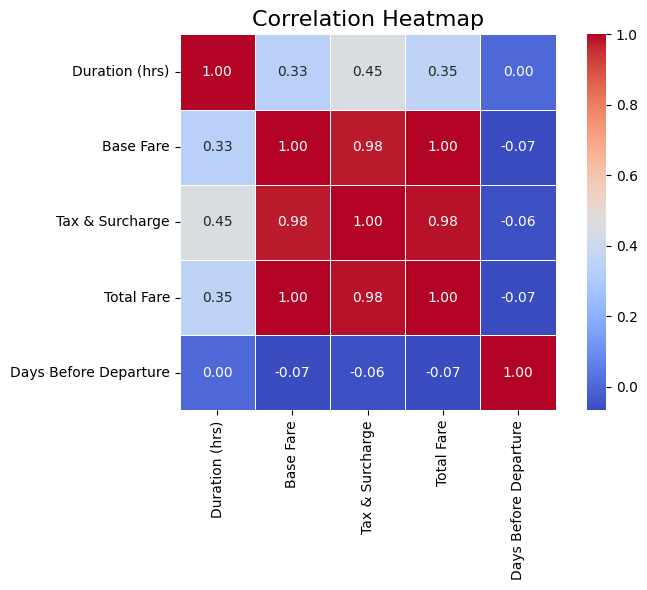

In [17]:
plt.figure(figsize=(8,6))
sns.heatmap(correlation_matrix,
            annot=True,
            fmt=".2f",  # Changed from ".2ft" to ".2f"
            cmap="coolwarm",
            linewidths=0.5,
            square=True)

plt.title("Correlation Heatmap", fontsize=16)
plt.tight_layout()
plt.show()


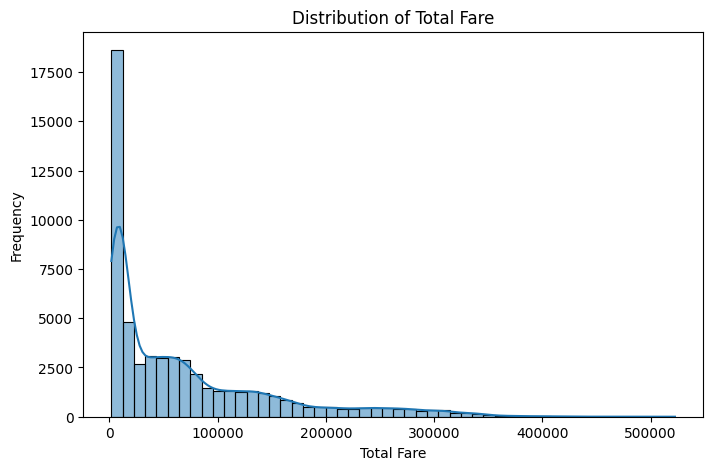

In [18]:
#Visual Analysis 
plt.figure(figsize=(8,5))
sns.histplot(df['Total Fare'], bins=50, kde=True)
plt.title("Distribution of Total Fare")
plt.xlabel("Total Fare")
plt.ylabel("Frequency")
plt.show()




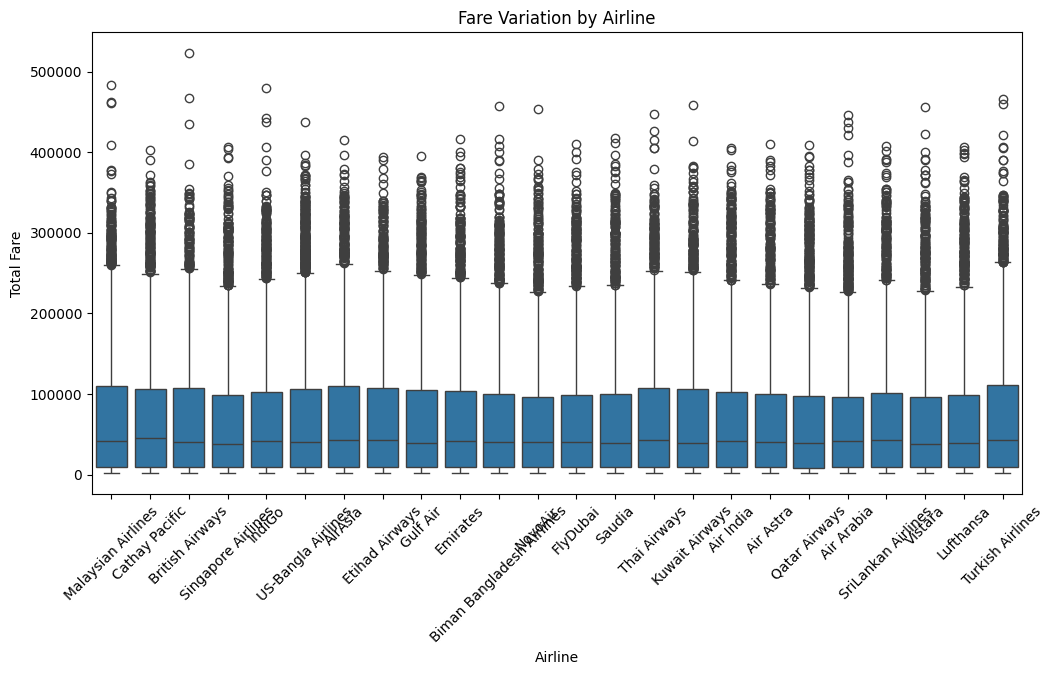

In [19]:
plt.figure(figsize=(12,6))
sns.boxplot(x='Airline', y='Total Fare', data=df)
plt.xticks(rotation=45)
plt.title("Fare Variation by Airline")
plt.show()


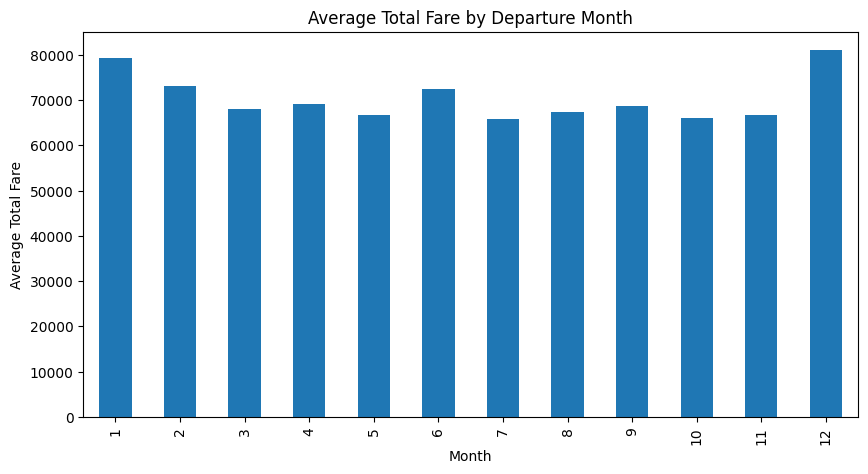

In [20]:
monthly_avg = df.groupby('Departure Month')['Total Fare'].mean()
monthly_avg.plot(kind='bar', figsize=(10,5))
plt.title("Average Total Fare by Departure Month")
plt.xlabel("Month")
plt.ylabel("Average Total Fare")
plt.show()


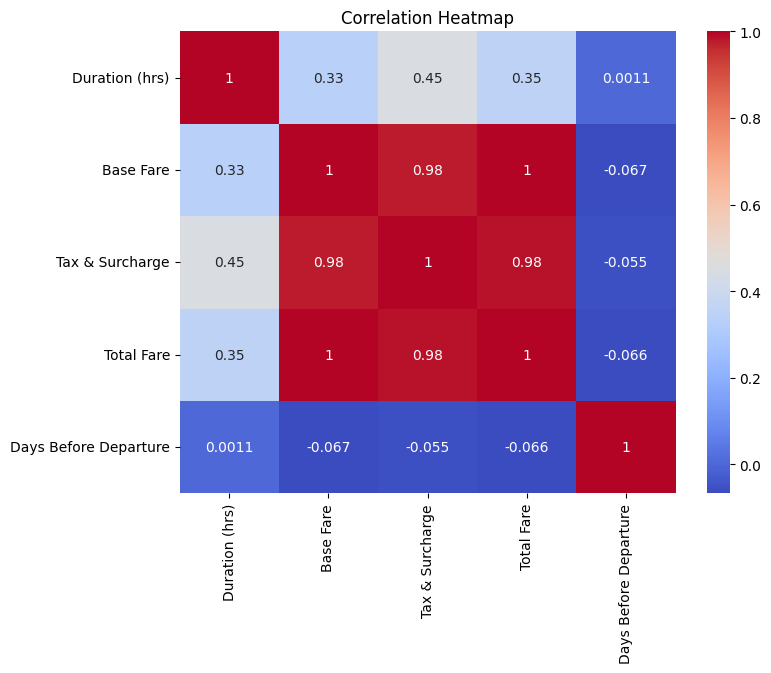

In [21]:
plt.figure(figsize=(8,6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

In [25]:
# 3. KPI Exploration

# Average fare per airline
avg_fare_airline = df.groupby("Airline")["Total Fare"].mean().sort_values(ascending=False)
print("Average fare per Airline:\n", avg_fare_airline)



Average fare per Airline:
 Airline
Turkish Airlines             74738.634474
AirAsia                      73830.162976
Cathay Pacific               72594.044978
Malaysian Airlines           72247.165833
Thai Airways                 72062.788892
IndiGo                       71904.319816
Air India                    71774.463192
US-Bangla Airlines           71421.249215
Kuwait Airways               71274.820497
Etihad Airways               71062.533751
Gulf Air                     70814.669765
SriLankan Airlines           70706.944806
British Airways              69892.944809
Biman Bangladesh Airlines    69501.049697
Emirates                     69363.935076
Qatar Airways                69285.314723
Air Arabia                   69094.361068
Lufthansa                    68608.154969
Saudia                       68461.151845
FlyDubai                     68310.266810
Air Astra                    67838.704593
NovoAir                      67833.990830
Singapore Airlines           67556.072055

In [26]:
# Most popular route (highest flight frequency)
df['Route'] = df['Source'] + " -> " + df['Destination']
popular_routes = df['Route'].value_counts().head(10)
print("Top 10 most popular routes:\n", popular_routes)


Top 10 most popular routes:
 Route
RJH -> SIN    417
DAC -> DXB    413
BZL -> YYZ    410
CXB -> DEL    408
CGP -> BKK    408
BZL -> JED    407
RJH -> JFK    404
SPD -> DEL    404
CGP -> CXB    404
CGP -> RJH    403
Name: count, dtype: int64


In [27]:

# Seasonal fare variation
seasonal_avg_fare = df.groupby("Season")["Total Fare"].mean().sort_values(ascending=False)
print("Average fare per season:\n", seasonal_avg_fare)



Average fare per season:
 Season
Hajj               96189.948444
Eid                90790.866343
Winter Holidays    79256.332750
Regular            67337.333588
Name: Total Fare, dtype: float64


In [28]:
# Top 5 most expensive routes
expensive_routes = df.groupby("Route")["Total Fare"].mean().sort_values(ascending=False).head(5)
print("Top 5 most expensive routes:\n", expensive_routes)

Top 5 most expensive routes:
 Route
SPD -> BKK    117348.650799
CXB -> YYZ    116616.846376
CXB -> LHR    116038.510824
BZL -> JFK    115428.345735
CXB -> JFK    115370.168147
Name: Total Fare, dtype: float64
